In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML, Image, Markdown

In [2]:
current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
dataset_dir = os.path.join(parent_directory,"Datasets")

In [3]:
players_df = pd.read_csv(f"{dataset_dir}/players.csv")
match_scores_df = pd.read_csv(f"{dataset_dir}/match_scores.csv")
fixtures_df = pd.read_csv(f"{dataset_dir}/fixtures.csv")
teams_df = pd.read_csv(f"{dataset_dir}/teams.csv")
points_table_df = pd.read_csv(f"{dataset_dir}/points.csv")

## Top Run Scorers in the Tournament

In [4]:
players_scores = match_scores_df[match_scores_df["dnb"] == 0] 
grouped_df = players_scores.groupby("player_id").agg({"runs":"sum", "is_out": "sum","player_id":"size"}).rename(columns={"player_id":"innings"}).sort_values(by="runs",ascending=False).reset_index()
grouped_df["average"] = grouped_df["runs"] / grouped_df["is_out"]
top_scorers = pd.merge(grouped_df, players_df, on="player_id")[["name","runs","innings","average"]].head(10)
top_scorers

,name,runs,innings,average
0,Virat Kohli,765,11,95.625000
1,Rohit Sharma,597,11,54.272727
2,Quinton de Kock,594,10,59.400000
3,Rachin Ravindra,578,10,64.222222
4,Daryl Mitchell,552,9,69.000000
5,David Warner,535,11,48.636364
6,Shreyas Iyer,530,11,66.250000
7,KL Rahul,452,10,75.333333
8,Rassie van der Dussen,448,10,49.777778
9,Mitchell Marsh,441,10,49.000000


## Top Run Scorers by Country

In [5]:
total_runs_by_player = match_scores_df.groupby(["team_id","player_id"]).agg({"runs":"sum", "is_out": "sum", "player_id":"size"}).rename(columns={"player_id":"innings"})
total_runs_by_player["average"] = total_runs_by_player["runs"] / total_runs_by_player["is_out"]
top_scorers = total_runs_by_player.loc[total_runs_by_player.groupby("team_id")["runs"].idxmax()]
top_scorers_by_country = pd.merge(top_scorers, players_df, on='player_id').sort_values('runs', ascending=False)
top_scorers_by_country[["name", "team_name", "innings", "runs", "average"]].reset_index().drop("index", axis=1)

,name,team_name,innings,runs,average
0,Virat Kohli,India,11,765,95.625000
1,Quinton de Kock,South Africa,16,594,59.400000
2,Rachin Ravindra,New Zealand,10,578,64.222222
3,David Warner,Australia,11,535,48.636364
4,Dawid Malan,England,9,404,44.888889
5,Mohammad Rizwan,Pakistan,12,395,65.833333
6,Ibrahim Zadran,Afghanistan,9,376,47.000000
7,Sadeera Samarawickrama,Sri Lanka,9,373,53.285714
8,Mahmudullah,Bangladesh,8,328,54.666667
9,Sybrand Engelbrecht,Netherlands,8,300,37.500000


## Highest Individual Score in the Tournament

In [6]:
top_five_scorers = match_scores_df.nlargest(5, "runs")
top_five_scorers[["player_name", "runs", "balls_faced", "fours", "sixes", "strike_rate"]].reset_index(drop=True)

,player_name,runs,balls_faced,fours,sixes,strike_rate
0,Glenn Maxwell,201,128,21,10,157.03
1,Mitchell Marsh,177,132,17,9,134.09
2,Quinton de Kock,174,140,15,7,124.28
3,David Warner,163,124,14,9,131.45
4,Devon Conway,152,121,19,3,125.61


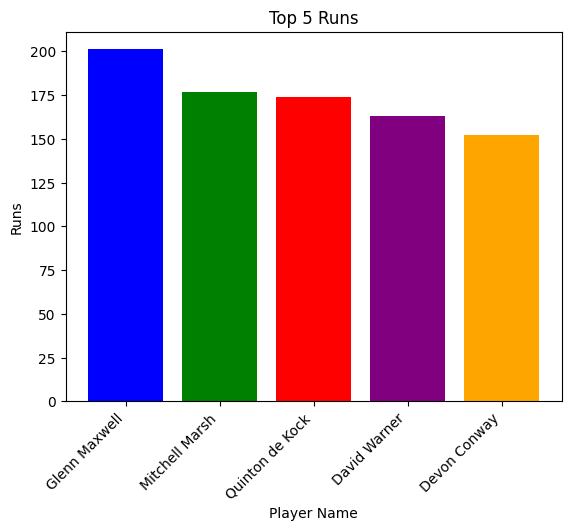

In [7]:
plt.bar(top_five_scorers['player_name'], top_five_scorers['runs'], color = ['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Player Name')
plt.ylabel('Runs')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Runs')
plt.show()

## Most Half Centuries in the Tournament

In [8]:
fifties = match_scores_df.groupby("player_id").agg(
    **{
        "50": ("runs", lambda x: ((x >= 50) & (x < 100)).sum())
      }
)

most_fifties_players = (
    pd.merge(fifties, players_df[["player_id", "team_name", "name"]], on="player_id")
    .sort_values(by="50", ascending=False)
    .reset_index(drop=True)
)

most_fifties_players = most_fifties_players[most_fifties_players["50"] != 0]

most_fifties_players[["name", "team_name", "50"]]

,name,team_name,50
0,Virat Kohli,India,6
1,Shubman Gill,India,4
2,Pathum Nissanka,Sri Lanka,4
3,Babar Azam,Pakistan,4
4,Abdullah Shafique,Pakistan,3
...,...,...,...
59,Shakib Al Hasan,Bangladesh,1
60,Charith Asalanka,Sri Lanka,1
61,Mehidy Hasan Miraz,Bangladesh,1
62,Harry Brook,England,1


## Most Centuries in the Tournament

In [9]:
centuries = match_scores_df.groupby("player_id").agg(
    **{
        "100": ("runs", lambda x: (x>=100).sum())
      }
)

most_centuries_players = (
    pd.merge(centuries, players_df[["player_id", "team_name", "team_id", "name"]], on="player_id")
    .sort_values(by="100", ascending=False)
    .reset_index(drop=True)
)

most_centuries_players = most_centuries_players[most_centuries_players["100"] != 0]

most_centuries_players[["name", "team_id", "team_name", "100"]]

,name,team_id,team_name,100
0,Quinton de Kock,9,South Africa,4
1,Virat Kohli,5,India,3
2,Rachin Ravindra,7,New Zealand,3
3,Rassie van der Dussen,9,South Africa,2
4,Shreyas Iyer,5,India,2
5,Travis Head,2,Australia,2
6,Daryl Mitchell,7,New Zealand,2
7,David Warner,2,Australia,2
8,Glenn Maxwell,2,Australia,2
9,Mitchell Marsh,2,Australia,2


## Most Centuries by Countries

In [10]:
country_centuries_grouped = most_centuries_players.groupby("team_id").agg({"team_id": "first", "100": "sum"}).reset_index(drop=True).sort_values(by="100", ascending=False)
centuries_by_countries = pd.merge(country_centuries_grouped, teams_df, on="team_id")
for index, row in centuries_by_countries.iterrows():
    image_path = os.path.join(parent_directory, row["flag_img"])
    flag_html = f'<img src="../static/imgs/flags/{row["team_name"]}.jpg" width="50" height="30" style="margin-right:10px;" />'
    info_html = f'<span style="font-size:18px;">{row["team_name"]}: {row["100"]} Centuries</span><br>'
    html = f'<div style="display:flex; align-items:center;">{flag_html}{info_html}</div>'
    display(HTML(html))